In [1]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [2]:
# Load your dataset (same preprocessing as before)
dataset = pd.read_csv("./final_features.csv")  # or whatever file you use
input_dataset = dataset.drop(['app_name', 'class'], axis=1)
output_dataset = dataset[['class']]

# Split again with the same random state (to match test set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_dataset, output_dataset, test_size=0.25, random_state=42)

In [3]:
# Load a saved model (e.g., Random Forest)
model = joblib.load("saved_models/XGBoost.pkl")

# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9884615384615385
Precision: 0.9884877492877492
Confusion Matrix:
 [[124   2]
 [  1 133]]


In [ ]:
# Use SHAP to explain predictions
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


c:\Users\bhard\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


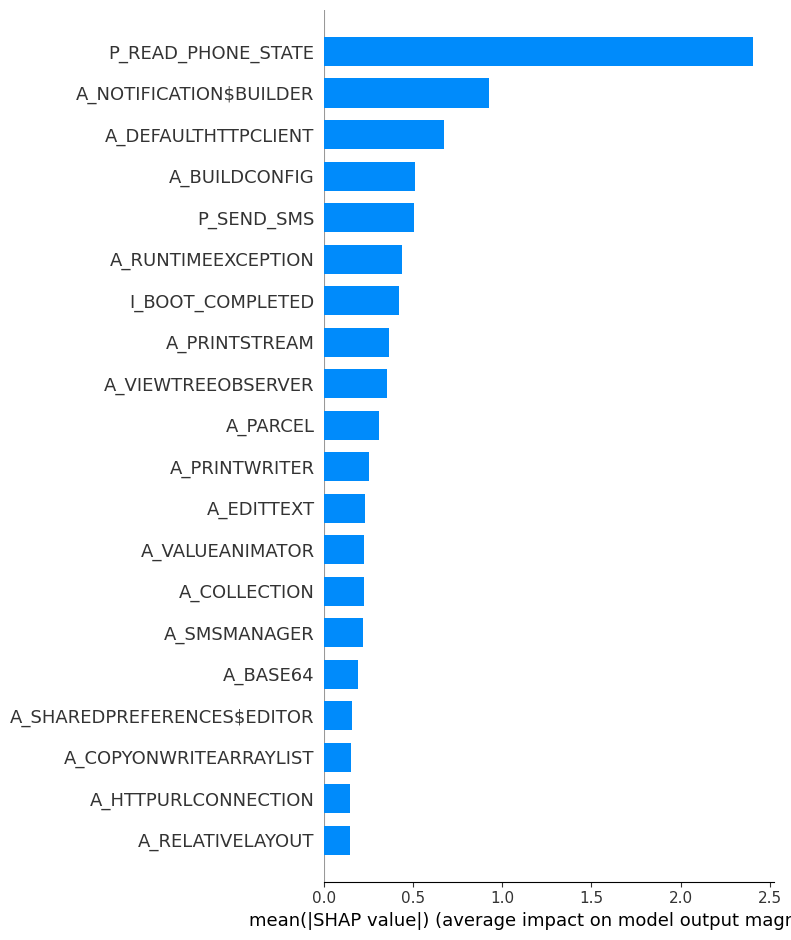

In [5]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


🧮 What does “Mean SHAP Value = 0” mean?
When the mean SHAP value for a feature is 0, it means:

On average, that feature does not contribute to changing the model’s predictions.

In [6]:
import numpy as np

# Calculate mean SHAP values for each feature
mean_shap = np.mean(np.abs(shap_values), axis=0)

# Get feature names with mean SHAP value == 0
zero_shap_features = X_test.columns[mean_shap == 0]
df = pd.DataFrame(zero_shap_features, columns=["Feature with SHAP=0"])
# df.to_excel("zero_shap_features.xlsx", index=False)
